# Filters

Animated visualizers of filters.

In [13]:
%matplotlib inline

import time

import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_combined
from neurodsp.sim import sim_cycle

from neurodsp.plts import plot_time_series
from neurodsp.utils import create_samples
from neurodsp.utils import set_random_seed

from neurodsp.filt.fir import *
from neurodsp.plts.filt import *

In [14]:
# Import local code
from vcode.utils.data import yield_sig as yield_sig2
from vcode.plts.utils import clear_output, animate_plot
from vcode.plts.base import plot_data

from vcode.measures.convolution import compute_convolution
from vcode.build.convolution import build_kernel_slide, build_convolution_output, build_all

## Setup

### Settings

In [5]:
import seaborn as sns
sns.set_context('talk')

In [6]:
# Set random seed
set_random_seed(505)

In [21]:
# Signal settings
fs = 250
n_seconds = 1.5

In [517]:
# Save settings
SAVE = False

## Filter

### Design a Filter

In [83]:
# Filter settings
pass_type = 'bandpass'
f_range = (8, 12)
#f_range = 10

In [84]:
filt_coefs = design_fir_filter(fs, pass_type, f_range)
samps = create_samples(len(filt_coefs))

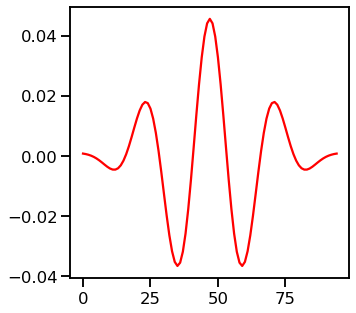

In [85]:
plot_data(filt_coefs, color='red')

### Compare Convolution

Double check that our custom convolution matches what we get from applying the filter normally. 

In [46]:
# 
out = apply_fir_filter(sig, filt_coefs)
out = remove_filter_edges(out, len(filt_coefs))
out2 = compute_convolution(sig, filt_coefs)

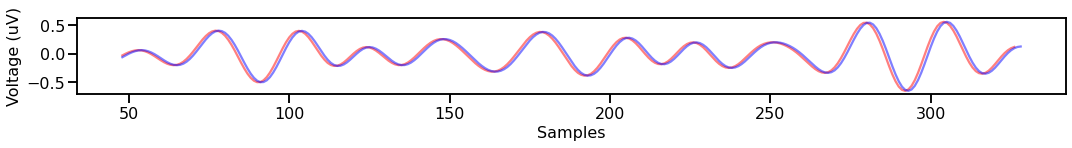

In [47]:
_, ax = plt.subplots(figsize=(15, 2))
plot_time_series(None, out, colors='red', alpha=0.5, ax=ax)
plot_time_series(None, out2, colors='blue', alpha=0.5, ax=ax)

## Convolution Animations

Woirds, words, words.

### Combined Signal

In [29]:
comps = {'sim_oscillation' : {'freq' : 10}, 
         'sim_powerlaw' : {'exponent' : -1, 'f_range' : (1, None)}}
sig = sim_combined(n_seconds, fs, comps)

In [30]:
# for ind in range(0, 1000, 10):
#     clear_output(wait=True)
#     _, ax = plt.subplots(figsize=[12, 2])
#     plot_time_series(None, sig, alpha=0.5, ax=ax)
#     plot_time_series(samps+ind, sig[samps+ind], marker='.', markersize=2, linewidth=0, colors='blue', ax=ax)
#     plot_time_series(samps+ind, filt_coefs * 100, colors='red', ax=ax)
#     ax.set(xticks=[], yticks=[], xlabel='', ylabel='');
#     plt.show();
#     time.sleep(0.25)

In [15]:
#build_kernel_slide(sig, filt_coefs * 2)

In [27]:
#build_convolution_output(sig, filt_coefs)

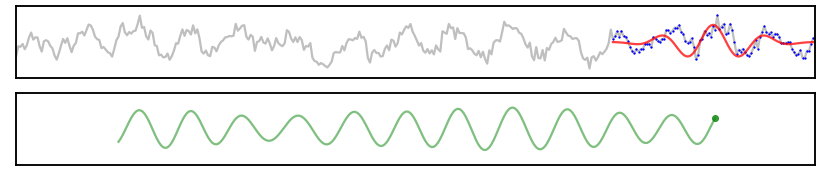

In [28]:
build_all(sig, filt_coefs*1.5, sleep=0.01)

### Impulse Response

In [31]:
impulse_sig = np.zeros_like(sig)
impulse_sig[int(len(impulse_sig)/2)] = 1

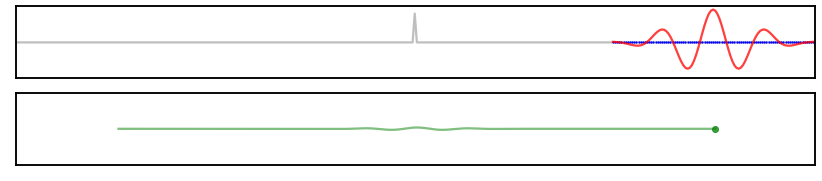

In [32]:
build_all(impulse_sig, filt_coefs, ylim=[-1.25, 1.25])

### Step Response

In [34]:
step_sig = np.zeros_like(sig)
step_sig[int(len(impulse_sig)/2):] = 1

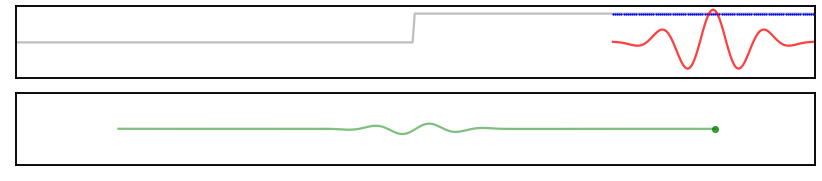

In [35]:
build_all(step_sig, filt_coefs, ylim=[-1.25, 1.25])

### Aperiodic Signal

In [36]:
sig = sim_powerlaw(n_seconds, fs, f_range=(1, None))

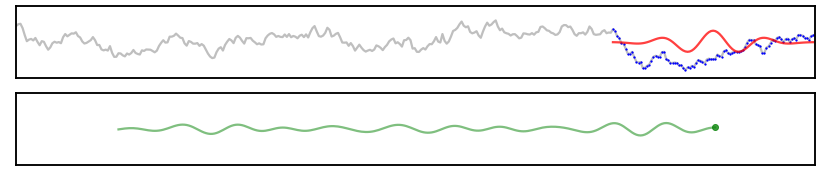

In [38]:
build_all(sig, filt_coefs)

### Burst Signal

In [39]:
n_cycles = 3

In [40]:
sine = sim_cycle(0.1, fs, 'sine')
burst = np.tile(sine, n_cycles)

In [41]:
burst_sig = np.zeros_like(sig)

In [42]:
index = int((len(burst_sig) / 2) - (len(burst) / 2))

In [43]:
burst_sig[index:index+len(burst)] = burst

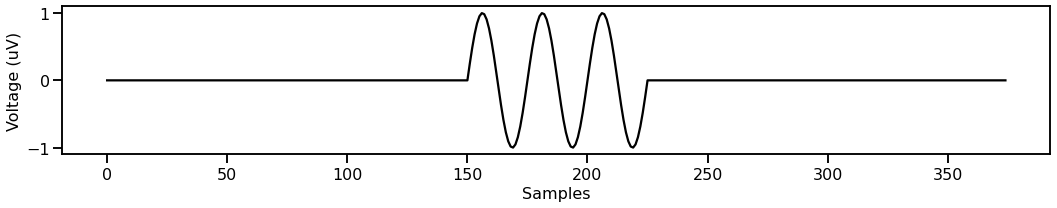

In [44]:
plot_time_series(None, burst_sig)

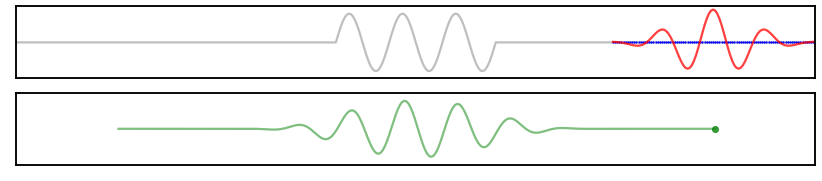

In [45]:
build_all(burst_sig, filt_coefs, ylim=[-1.25, 1.25])

In [450]:
def make_axes():
    """Make axes for combined plot.

    Placement definitions: Left, Bottom, Width, Height
    """
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.0, 0.8, 0.15, 0.75])
    ax1.axis('off')
    ax2 = fig.add_axes([0.35, 0.8, 0.75, 0.75])
    ax3 = fig.add_axes([1.3, 0.8, 0.75, 0.75])

    return fig, [ax1, ax2, ax3]

def add_text(ax, f_type=None, f_range=None, n_cycles=None):
    """Helper function to add text labels to filter properties plot."""
    
    fontdict = {'fontsize' : 15, 'fontname' : 'Verdana',
                'ha' : 'center', 'linespacing' : 1.5}
    
    ax.text(0.1, 0.85, "FIR\nFilter", fontdict)
    ax.text(0.1, 0.55, "type:\n{}".format(f_type), fontdict)
    ax.text(0.1, 0.25, "f_range:\n{}".format(str(f_range)), fontdict)
    if n_cycles is not None:
        ax.text(0.1, 0.0, "n_cycles:\n{}".format(str(n_cycles)), fontdict)
        
# Hack to pass through some custom styling
def passer(*args, **kwargs): pass

def build_filt_coefs(fs, pass_type, f_range, n_cycles, save=False, index=0, label=''):
    """Build function for filter properties."""
    
    filt_coefs = design_fir_filter(fs, pass_type, f_range, n_cycles)
    f_db, db = compute_frequency_response(filt_coefs, 1, fs)
    
    clear_output(wait=True)
    
    fig, axes = make_axes()
    add_text(axes[0], pass_type, f_range, n_cycles)
    plot_frequency_response(f_db, db, ax=axes[1],
                            xlim=[0, 150], ylim=[-100, 0], custom_styler=xx)
    plot_impulse_response(fs, filt_coefs, ax=axes[2], ylim=[-0.15, 1], custom_styler=xx)
    
    animate_plot(fig, save, index, label)

In [451]:
def incrementer(start=0, end=999):
    """Generator that returns an incrementing index value.
    
    Parameters
    ----------
    start, end : int
        The start and end point for the incrementer.
    
    Yields
    ------
    ind : int
        The current index value.
    """

    for ind in range(start, end):
        yield ind

## Filter Property Animations

Explore filter properties (impulse response & frequency response), across:
- across frequency ranges
- across across filter orders (lengths / n_cycles)

In [452]:
# Reset signal settings
fs = 1000

In [453]:
# Reset filter settings
pass_type = 'bandpass'
f_range = (8, 12)

In [454]:
filt_coefs = design_fir_filter(fs, pass_type, f_range)

In [455]:
f_db, db = compute_frequency_response(filt_coefs, 1, fs)

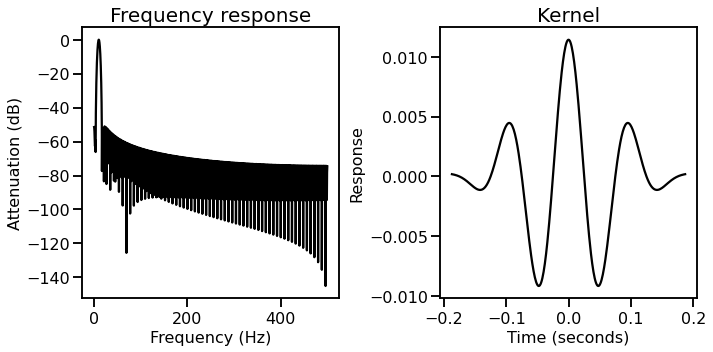

In [456]:
# Plot filter properties
plot_filter_properties(f_db, db, fs, filt_coefs)

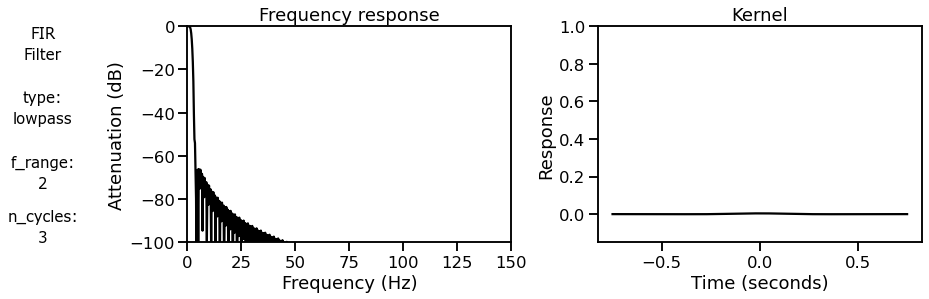

In [520]:
# Filter properties across lowpass frequency ranges
pass_type = 'lowpass'
f_ranges = (100, 1, -1)
inc = incrementer()
for f_range in np.arange(*f_ranges):
    # Note the type is an interim fix for an isue that will be fixed upstream in neurodsp
    build_filt_coefs(fs, pass_type, int(f_range), n_cycles, SAVE, next(inc), 'lowpass_frange')

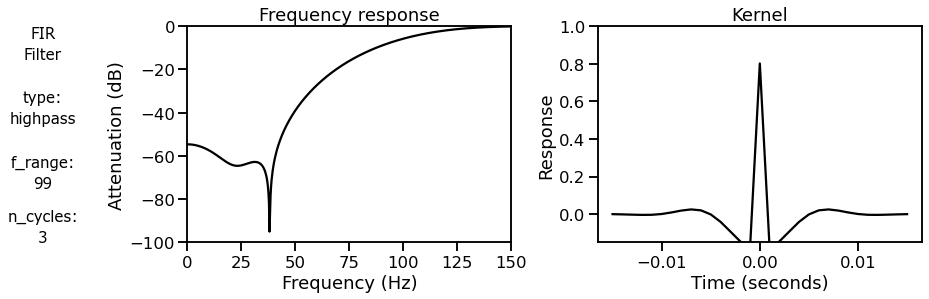

In [516]:
# Filter properties across highpass frequency ranges
pass_type = 'highpass'
f_ranges = (1, 100)
inc = incrementer()
for f_range in range(*f_ranges):
    build_filt_coefs(fs, pass_type, f_range, n_cycles, SAVE, next(inc), 'highpass_frange')

### Filter Length (n_cycles)

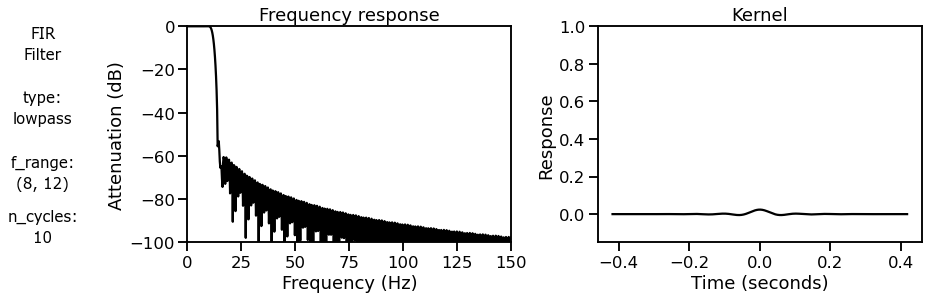

In [526]:
filt_type = 'bandpass'
f_range = (8, 12)
inc = incrementer()
cycle_range = (1, 11)
for n_cycles in range(*cycle_range):
    build_filt_coefs(fs, pass_type, f_range, n_cycles, SAVE, next(inc), 'highpass_frange')

### Filter Bandwidth

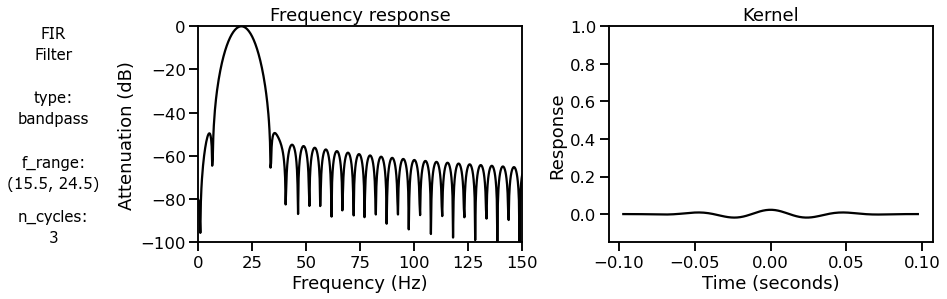

In [538]:
pass_type = 'bandpass'
f_range = (8, 12)
n_cycles = 3
inc = incrementer()
cen = 20
bw_range = (0.5, 5, 0.5)
for bw in np.arange(*bw_range):
    build_filt_coefs(fs, pass_type, (cen-bw, cen+bw), n_cycles, SAVE, next(inc), 'highpass_frange')

## Filter Output Animations

